## Project - 2 : Predicting players rating
In this project I am going to predict the overall rating of soccer player based on their attributes such as crossing,finishing etc.

## About the Dataset
The ultimate Soccer database for data analysis and machine learning


### The ultimate Soccer database for data analysis and machine learning
<p>The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch. </p>
<ul>
<li>+25,000 matches</li>
<li>+10,000 players</li>
<li>11 European Countries with their lead championship</li>
<li>Seasons 2008 to 2016</li>
<li>Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates</li>
<li>Team line up with squad formation (X, Y coordinates)</li>
<li>Betting odds from up to 10 providers</li>
<li>Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches</li>
</ul>    
<p>The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset. </p>

In [1]:
#Import Libraries for Sqllite
import sqlite3
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt

#Import Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
%matplotlib inline

## Data Pre-Processing

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')  #Creating a Connection object that represents the database 
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)  #Reading SQL query into a DataFrame

## Data Exploration

In [3]:
df.columns #Columns of dataframe df

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [4]:
df.shape

(183978, 42)

In [5]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

## Data Cleaning

In [7]:
#All Columns
#['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 
#  'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
#  'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy','long_passing', 'ball_control', 'acceleration', 
#  'sprint_speed','agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 
#  'aggression', 'interceptions', 'positioning','vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
#  'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


In [8]:
# Dropping the columns ['id', 'player_fifa_api_id', 'player_api_id', \
# 'date', 'attacking_work_rate', 'defensive_work_rate']
# As these fields are not not having significant data
print("imported dataset >> ")
print('-'*50)
print(df.head(5))
print('-'*50)
print("Dropping the columns ['id', 'player_fifa_api_id', 'player_api_id'")
#print("'date', 'attacking_work_rate', 'defensive_work_rate'")
print("As these fields are not not having significant data")
print('-'*50)
#df.drop(['id', 'player_fifa_api_id', 'player_api_id', \
#              'date', \
#              'attacking_work_rate', \
#              'defensive_work_rate'], \
#                axis=1, inplace=True)
df.drop(['id', 'player_fifa_api_id', 'player_api_id'], axis=1, inplace=True)


imported dataset >> 
--------------------------------------------------
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right         

In [9]:
df.shape

(183978, 39)

In [10]:
# rows count before dropping NA
rows_before_dropping = df.shape[0]
rows_before_dropping

183978

In [11]:
# Check null
df.isnull().sum()

date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving               836
gk_handling         

In [12]:
# Dropping the nulls
df = df.dropna()

In [13]:
# rows count after dropping NA
rows_after_dropping = df.shape[0]
rows_after_dropping

180354

In [14]:
# Check null again
df.isnull().sum()

date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [15]:
# number of rows dropped
diff = rows_before_dropping - rows_after_dropping
diff
print("Total number of rows dropped is {} wich is {:.4}% of total rows."   \
              .format(diff,(diff/rows_before_dropping)*100))
print('-'*50)

Total number of rows dropped is 3624 wich is 1.97% of total rows.
--------------------------------------------------


In [16]:
#checking for attacking_work_rate column and defensive_work_rate column for any specific details and updating them 

In [17]:
df.shape

(180354, 39)

In [18]:
df['attacking_work_rate'].unique()

array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [19]:
df['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '5', 'ean', 'o', '1', 'ormal', '7', '2',
       '8', '4', 'tocky', '0', '3', '6', '9', 'es'], dtype=object)

In [20]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [21]:
df.shape

(180354, 39)

In [22]:
def updateAttackingRate(x):
    list2=["medium","norm","y","stoc"]
    list1=["low","le"]
    list3=["high"]
    if    x['attacking_work_rate'] in list2   : return "medium"
    elif  x['attacking_work_rate'] in list3   : return "high"
    elif  x['attacking_work_rate'] in list1   : return "low"
    elif  x['attacking_work_rate'] == "None"  : return "None"


df['attacking_rate']= df.apply(updateAttackingRate,axis=1)

In [23]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [24]:
df['attacking_rate'].value_counts()

medium    125567
high       42823
low         8647
None        3317
Name: attacking_rate, dtype: int64

In [25]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [26]:
# 0 1 2 - low
# 3 4 5 6 - medium
# 7 8 9 - high

def updateDefensiveRate(x):
    list1=['low','_0','0','o','1','2']
    list2=['medium','tocky','ean','es','ormal','3','4','5','6']
    list3=['high','7','8','9']
    
    if    x['defensive_work_rate'] in list1  : return "low"
    elif  x['defensive_work_rate'] in list2   : return "medium"
    elif  x['defensive_work_rate'] in list3   : return "high"


df['defensive_rate']= df.apply(updateDefensiveRate,axis=1)

In [27]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [28]:
df['defensive_rate'].value_counts()

medium    132190
high       27461
low        20703
Name: defensive_rate, dtype: int64

In [29]:
# Observing above values we can conclue that attacking_work_rate & defensive_work_rate do not hold information related to 
# analysis and can also be dropped

In [30]:
df.shape

(180354, 41)

In [31]:
df = df.drop('defensive_work_rate', 1)

In [32]:
df = df.drop('attacking_work_rate', 1)

In [33]:
df.shape

(180354, 39)

In [34]:
df.head()

,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,attacking_rate,defensive_rate
0,2016-02-18 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,medium,medium
1,2015-11-19 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,medium,medium
2,2015-09-21 00:00:00,62.0,66.0,right,49.0,44.0,71.0,61.0,44.0,51.0,...,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,medium,medium
3,2015-03-20 00:00:00,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,medium,medium
4,2007-02-22 00:00:00,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,medium,medium


## Data Visualization

### Histogram Plot

In [35]:
clms = list(df.columns[1:]) #Listing the columns of dataframe df starting from 2nd column
print(clms) #Printing clms list 

['overall_rating', 'potential', 'preferred_foot', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'attacking_rate', 'defensive_rate']


In [36]:
len(clms) #Lenth of the clms list

38

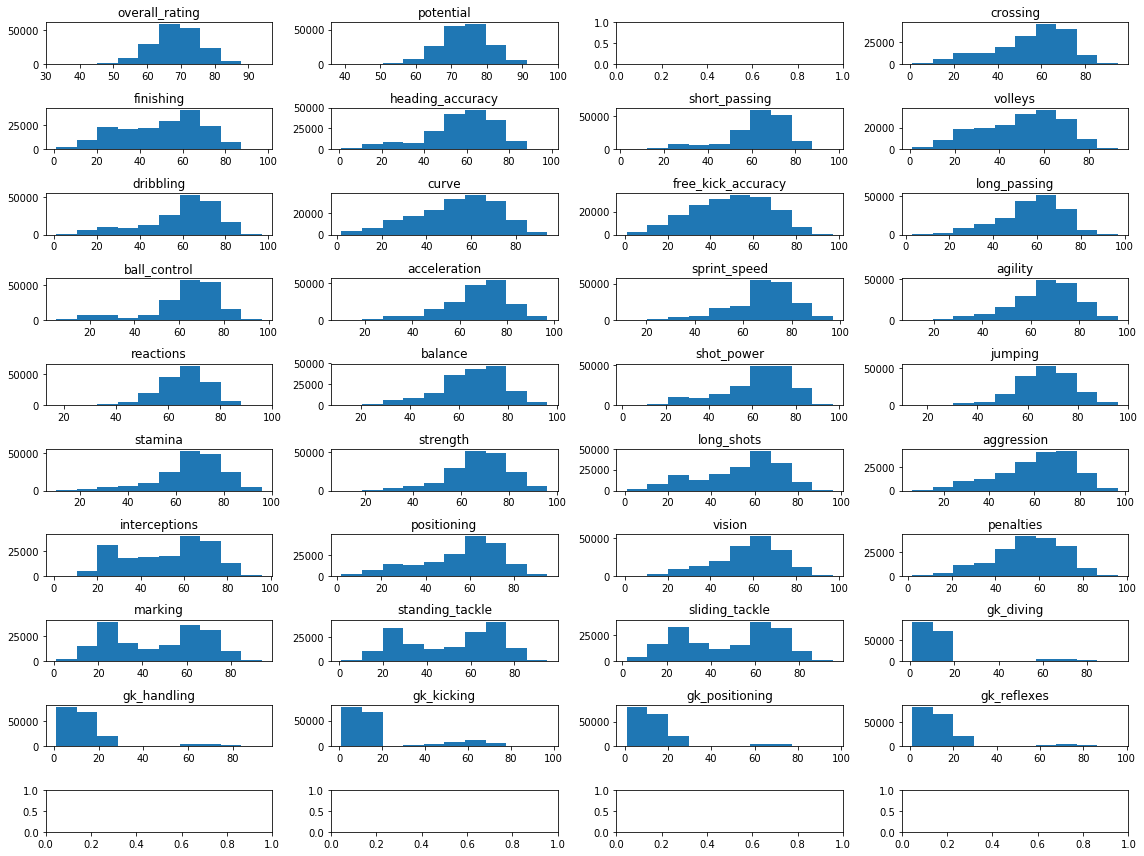

In [37]:
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
#    print(i)
#    print(ax)
    if i == 2 or i == 36 or i ==37 :  #skipping for string data ie preferred_foot,attacking_rate,defensive_rate
        continue
    if i < len(clms):
        ax.hist(df[clms[i]])
        ax.set_title(clms[i])
plt.tight_layout()
plt.show()

In [38]:
df['preferred_foot'].unique()

array(['right', 'left'], dtype=object)

In [39]:
df['preferred_foot'].value_counts()

right    136247
left      44107
Name: preferred_foot, dtype: int64

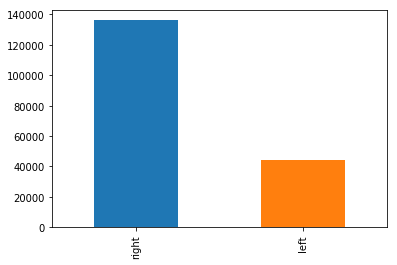

In [40]:
df['preferred_foot'].value_counts().plot(kind='bar')

In [41]:
df['attacking_rate'].unique()

array(['medium', 'high', 'low', 'None'], dtype=object)

In [42]:
df['attacking_rate'].value_counts()

medium    125567
high       42823
low         8647
None        3317
Name: attacking_rate, dtype: int64

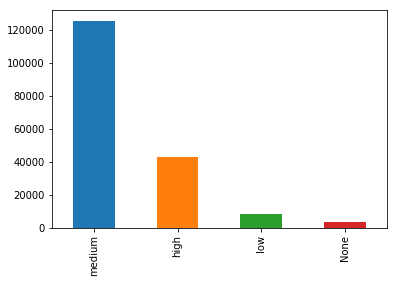

In [43]:
df['attacking_rate'].value_counts().plot(kind='bar')

In [44]:
df['defensive_rate'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [45]:
df['defensive_rate'].value_counts()

medium    132190
high       27461
low        20703
Name: defensive_rate, dtype: int64

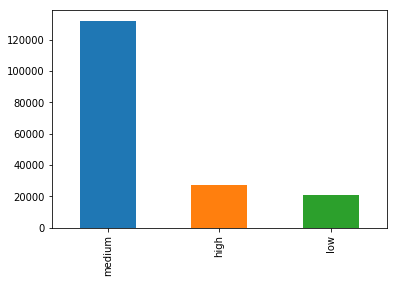

In [46]:
df['defensive_rate'].value_counts().plot(kind='bar')

### Scatter Plot

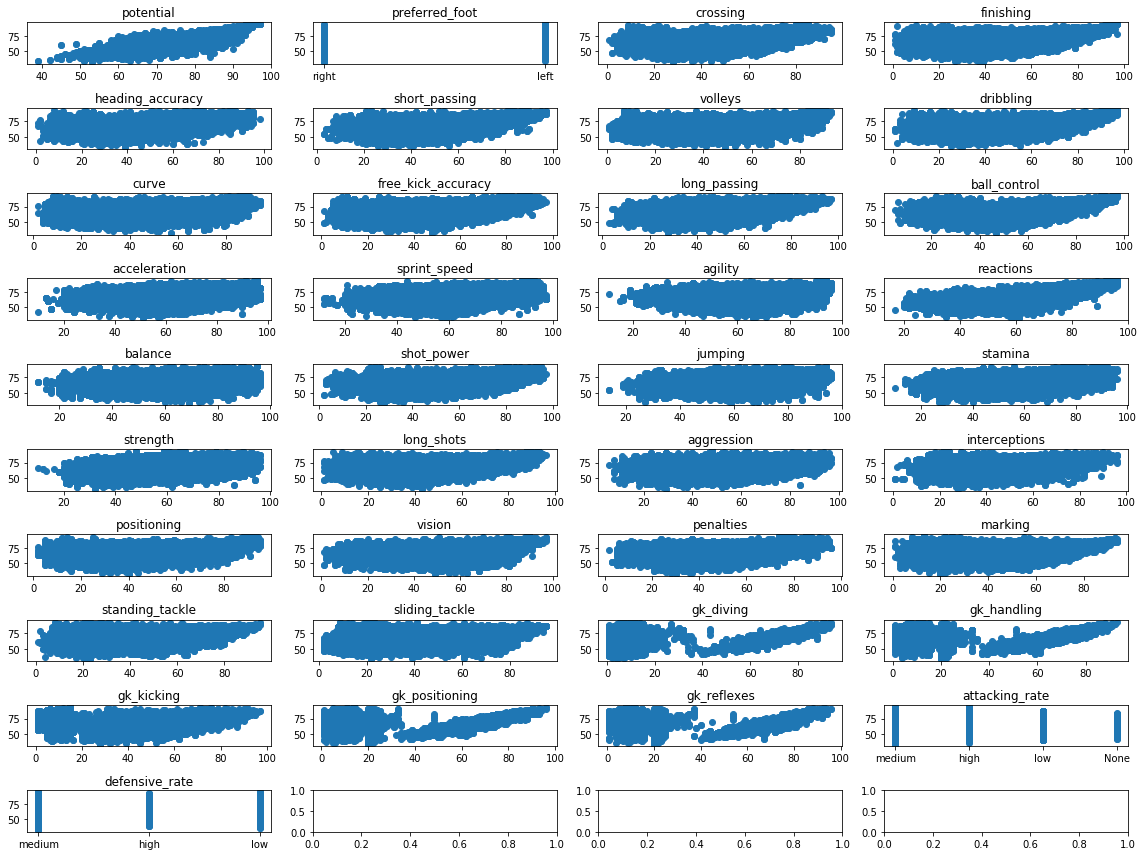

In [47]:
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < len(clms)-1:
        ax.scatter(df[clms[i+1]], df[clms[0]])
        ax.set_title(clms[i+1])
plt.tight_layout()
plt.show()

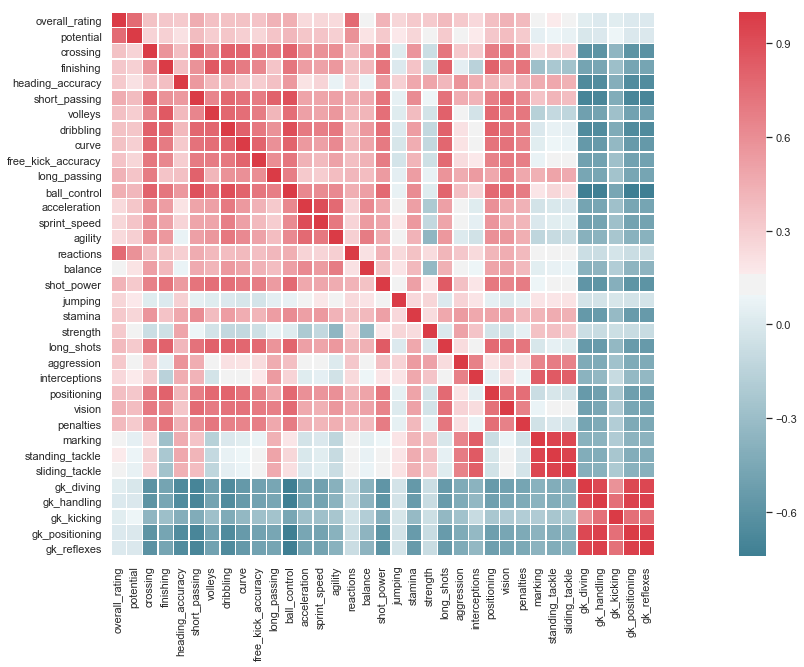

In [48]:
#Correlation Matrix
sns.set(style="white")
df_corr= df[1:]
corr = df_corr.dropna().corr() #Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) #Generate a mask 
f, ax = plt.subplots(figsize=(30, 10)) #Set up the matplotlib figure
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax) #Draw the heatmap with the mask and correct aspect ratio

## Preparing Data for Linear Regression

In [49]:
df.loc[:, "new_date"] = df["date"].apply(pd.to_datetime) #Creating a new column new_date and changing the date time format

In [50]:
df.loc[:, "day"] = df["new_date"].apply(lambda x: x.day) #Creating a day column and assigning the day values of new_date column

In [51]:
df.loc[:, "month"] = df["new_date"].apply(lambda x: x.month) #Creating a month column and assigning the month values of new_date column

In [52]:
df.loc[:, "year"] = df["new_date"].apply(lambda x: x.year) #Creating a day year and assigning the year values of new_date column

In [53]:
df.loc[:, "year"] = df["new_date"].apply(lambda x: x.year) #Creating a day year and assigning the year values of new_date column

In [54]:
df["year"].unique() #Unique year values of the year column

array([2016, 2015, 2007, 2014, 2013, 2012, 2011, 2010, 2009, 2008],
      dtype=int64)

In [55]:
df.columns

Index(['date', 'overall_rating', 'potential', 'preferred_foot', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'attacking_rate', 'defensive_rate', 'new_date', 'day', 'month', 'year'],
      dtype='object')

In [56]:
cat_clms =  ["preferred_foot", "attacking_rate", "defensive_rate", "year", "month", "day"] #Catagory Column List

In [57]:
df.head() #Returns the first 5 rows of dataframe df

,date,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,attacking_rate,defensive_rate,new_date,day,month,year
0,2016-02-18 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,...,11.0,10.0,8.0,8.0,medium,medium,2016-02-18,18,2,2016
1,2015-11-19 00:00:00,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,...,11.0,10.0,8.0,8.0,medium,medium,2015-11-19,19,11,2015
2,2015-09-21 00:00:00,62.0,66.0,right,49.0,44.0,71.0,61.0,44.0,51.0,...,11.0,10.0,8.0,8.0,medium,medium,2015-09-21,21,9,2015
3,2015-03-20 00:00:00,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,...,10.0,9.0,7.0,7.0,medium,medium,2015-03-20,20,3,2015
4,2007-02-22 00:00:00,61.0,65.0,right,48.0,43.0,70.0,60.0,43.0,50.0,...,10.0,9.0,7.0,7.0,medium,medium,2007-02-22,22,2,2007


In [58]:
df =  df.drop(["date", "new_date"], axis = 1) #Dropping the date and new_date columns

In [59]:
for clm in cat_clms:
    dummies = pd.get_dummies(df[clm], prefix = clm)
    df = df.join(dummies)
    df = df.drop(clm, axis = 1)

In [60]:
df.columns #Columns of dataframe df

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot_left',
       'preferred_foot_right', 'attacking_rate_None', 'attacking_rate_high',
       'attacking_rate_low', 'attacking_rate_medium', 'defensive_rate_high',
       'defensive_rate_low', 'defensive_rate_medium', 'year_2007', 'year_2008',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'year_2016', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month

In [61]:
df.head() #Returns the first 5 rows of dataframe df

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,0,0,0,0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,0,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,0,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,0,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,1,0,0,0,0,0,0,0,0,0


In [62]:
df.shape #Shape of the dataframe df

(180354, 97)

## Train, Test & Split

In [63]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows
df = df.reindex(np.random.permutation(df.index))

In [64]:
df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
8012,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,0,0,0,0
157705,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,0,0,0,0
92651,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,0,0,0,0
36899,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,0,0,0,0
39969,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,1,0,0,0,0,0,0,0,0,0


In [65]:
# Defining the X anf y parameters
X = df.iloc[:,1:]   # 'other than overall rating, i.e. column 1'
y = df.iloc[:,0]    #  Need to predict 'Overall rating' 

In [66]:
# Splitting the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

## Linear Regression
THE REGRESSION EQUATION
A line in a two dimensional or two-variable space is defined by the equation Y=a+b*X; in full text: the Y variable can be expressed in terms of a constant (a) and a slope (b) times the X variable. The constant is also referred to as the intercept, and the slope as the regression coefficient or B coefficient
In the multivariate case, when there is more than one independent variable, the regression line cannot be visualized in the two dimensional space, but can be computed just as easily. In general then, multiple regression procedures will estimate a linear equation of the form:

Y = a + b1*X1 + b2*X2 + ... + bp*Xp

In [67]:
print('-'*50)
# Applying Linear regression
# Applying Linear regression
# follow the usual sklearn pattern: import, instantiate, fit
lm = LinearRegression()
lm.fit(X_train, y_train)
# print intercept and coefficients

print("Intercept : " ,lm.intercept_)
print("Coeeficient : ", lm.coef_)

# Predicting the values using linear regression
print('-'*75)
print("Predicted Values")
y_prediction = lm.predict(X_test)

y_prediction


--------------------------------------------------
Intercept :  -3.2254260221267543
Coeeficient :  [ 3.87535981e-01  2.48575545e-02  1.30006031e-02  7.24518793e-02
  3.28086100e-02  5.18865332e-03 -1.72776035e-02  8.46373533e-03
  1.23868089e-02  9.51060093e-03  1.25686790e-01  7.03295719e-03
  1.37983851e-02 -1.13687828e-02  1.96498298e-01  9.73193384e-03
  1.54081508e-02  1.25904712e-02 -9.72725412e-04  5.30096647e-02
 -1.64596737e-02  2.14463484e-02  2.04913349e-02 -7.39877745e-03
  1.07239851e-02  1.72434282e-02  2.98905752e-02  1.21630587e-03
 -2.94185422e-02  1.30317912e-01  3.73159547e-02  8.48674519e-04
  5.60537009e-02  2.56402173e-02  5.49388744e-03 -5.49388744e-03
 -4.48717277e-01 -2.79189761e-01  1.01865689e+00 -2.90749852e-01
 -7.90374168e-02  3.81816843e-01 -3.02779426e-01 -1.07998541e+00
 -2.25828499e+00 -1.92387619e+00 -1.00801367e+00  2.21030436e-01
  9.48274278e-01  1.00391983e+00  1.11096755e+00  1.32762395e+00
  1.65834422e+00 -1.80053717e-01 -7.72213134e-02 -1.0831

array([73.15410844, 68.8287504 , 67.17479301, ..., 63.01024265,
       66.2005834 , 72.87284781])

## Evaluating the Model Using RMSE


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of 
how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, 
it tells how concentrated the data is around the line of best fit

In [68]:
#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_prediction) #Mean Squared Error: To check the level of error of a model
print(mse)

7.1695255086469025


In [69]:
print('-'*75)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('RMSE : ', RMSE)
print('-'*75)

---------------------------------------------------------------------------
RMSE :  2.677596965311789
---------------------------------------------------------------------------


Coefficient of Determination. The coefficient of determination (denoted by R2)
R-squared is a statistical measure of how close the data are to the fitted regression line. 
It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 
0% indicates that the model explains none of the variability of the response data around its mean
It is a key output of regression analysis. It is interpreted as the proportion of the variance in the dependent variable 
that is predictable from the independent variable.

In [70]:
r2_score(y_test , y_prediction)

0.8531536709256147

In [71]:
linearReg_score = lm.score(X_test,y_test)
print('-'*75)
print("Predicting based on Simple Linear regression we get the score as : {:.5}%" \
                                      .format(linearReg_score*100))
print('-'*75)

---------------------------------------------------------------------------
Predicting based on Simple Linear regression we get the score as : 85.315%
---------------------------------------------------------------------------


## Predicting overall_rating using Test Data

In [72]:
y_prediction.shape

(36071,)

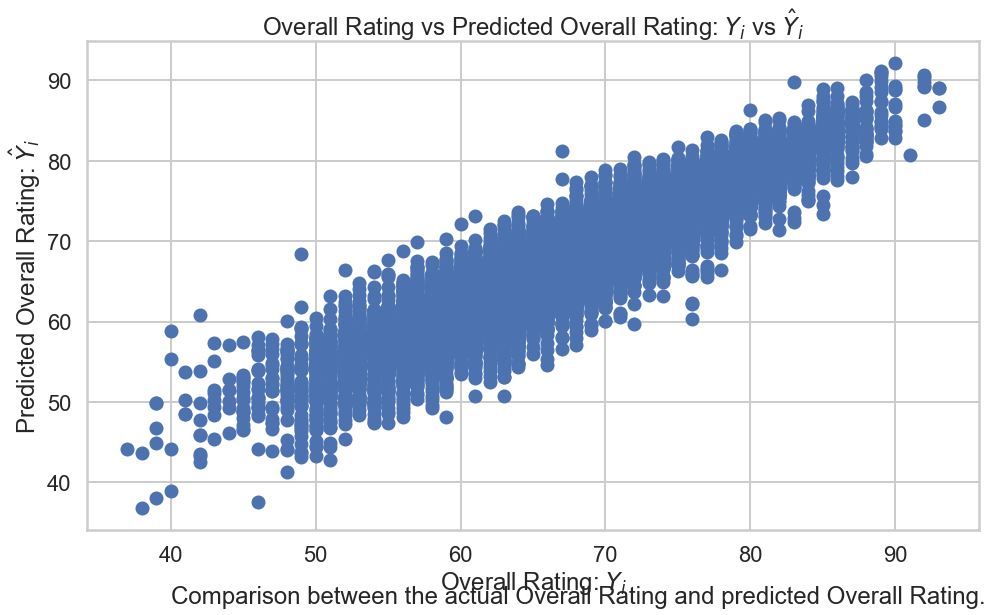

In [73]:
#To visualize the differences between actual overall rating and predicted values, creating a scatter plot.
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(16,9))
plt.scatter(y_test , y_prediction)
plt.xlabel("Overall Rating: $Y_i$")
plt.ylabel("Predicted Overall Rating: $\hat{Y}_i$")
plt.title("Overall Rating vs Predicted Overall Rating: $Y_i$ vs $\hat{Y}_i$")
plt.text(40,25, "Comparison between the actual Overall Rating and predicted Overall Rating.", ha='left')
plt.show()

C:\Users\Jaideep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


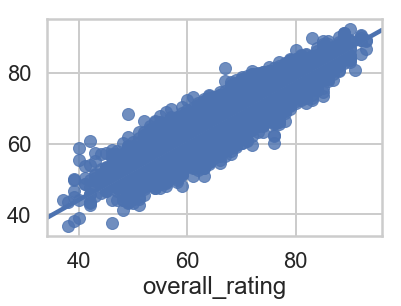

In [74]:
sns.regplot(y_test, y_prediction, data=df, fit_reg=True) #Plot Y_test and Y_pred for Linear Regression Model.

C:\Users\Jaideep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


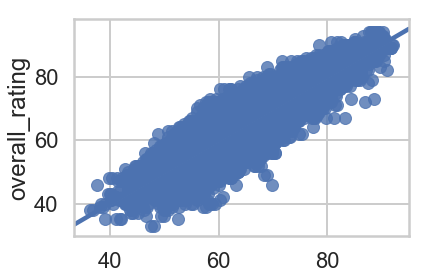

In [75]:
sns.regplot(x=lm.predict(X), y=df['overall_rating'], data=df, fit_reg=True) #Plot predicted and actual Overall Rating values.

# Decision Tree
Why chose decision trees?
Different kinds of models have different advantages. The decision tree model is very good at handling tabular data 
with numerical features, or categorical features with fewer than hundreds of categories. 
Unlike linear models, decision trees are able to capture non-linear interaction between the features and the target.

One important note is that tree based models are not designed to work with very sparse features. 
When dealing with sparse input data (e.g. categorical features with large dimension), we can either pre-process 
the sparse features to generate numerical statistics, or switch to a linear model, which is better suited for such scenarios.


Fitting Decision Tree Regression to the Training set

In [76]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeRegressor

In [77]:
regressor_desisionTree=DecisionTreeRegressor()
regressor_desisionTree.fit(X_train,y_train)
# Predicting the Test set results
y_prediction = regressor_desisionTree.predict(X_test)
print('-'*75)
print("Predicted Values :", y_prediction)

print('-'*75)

---------------------------------------------------------------------------
Predicted Values : [75. 72. 67. ... 62. 70. 73.]
---------------------------------------------------------------------------


## Evaluating the Model Using RMSE


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of 
how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, 
it tells how concentrated the data is around the line of best fit

In [78]:
#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_prediction) #Mean Squared Error: To check the level of error of a model
print(mse)

1.8535388539269773


In [79]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print('-'*75)
print('RMSE : ', RMSE)
print('-'*75)

---------------------------------------------------------------------------
RMSE :  1.3614473379190901
---------------------------------------------------------------------------


Coefficient of Determination. The coefficient of determination (denoted by R2)
R-squared is a statistical measure of how close the data are to the fitted regression line. 
It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 
0% indicates that the model explains none of the variability of the response data around its mean
It is a key output of regression analysis. It is interpreted as the proportion of the variance in the dependent variable 
that is predictable from the independent variable.

In [80]:
r2_score(y_test , y_prediction)

0.9620357893743948

In [81]:
reg_decisionTreeReg_score=regressor_desisionTree.score(X_test,y_test)
print('-'*75)
print("Predicting after applying Decision Tree Regression we get the score as : {:.5}%" \
                                      .format(regressor_desisionTree.score(X_test,y_test)*100))
print('-'*75)

---------------------------------------------------------------------------
Predicting after applying Decision Tree Regression we get the score as : 96.204%
---------------------------------------------------------------------------


## Model Evaluation Using Cross-Validation

In [82]:
#Evaluating the model using 10-fold cross-validation
scores = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=10)
scores

array([-7.43869699, -7.09909482, -7.17622632, -7.30622071, -7.16294602,
       -7.5722824 , -7.13949663, -7.32080193, -7.45113095, -7.22623321])

In [83]:
np.sqrt(scores.mean() * -1)

2.6998727744546653

In [84]:
print("The Root Mean Square Error using cross validation for the Model is "+ str(np.sqrt(scores.mean() * -1)) +" and the Results can be further improved using feature extraction and rebuilding, training the model.")

The Root Mean Square Error using cross validation for the Model is 2.6998727744546653 and the Results can be further improved using feature extraction and rebuilding, training the model.
